In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
from scipy.optimize import minimize
from scipy.stats import multivariate_normal
from matplotlib import pyplot as plt
from IPython import display

# Helper Methods

## Example Objective Functions

In [3]:
def get_multivariate_normal(mean, covariance, coord, height=None):
    dist = multivariate_normal(mean, covariance)
    z = dist.pdf(coord)
    if height is not None and np.max(z) != 0:
        z = (z / np.max(z)) * height
    return z

## Plotting

In [4]:
def plot_contour(x, y, z, levels=[0, 1, 2, 3, 4, 5]):
    cs = contour(x, y, z, colors='b', levels=levels)
    clabel(cs, fmt="%d")

In [5]:
def plot_gaussian(mu=(0.5, 0.5), cov=.4):
    x_gauss, y_gauss = np.mgrid[-1:1:.02, -1:1:.02]
    coord = np.empty(x_gauss.shape + (2,))
    coord[:, :, 0] = x_gauss
    coord[:, :, 1] = y_gauss
    z = get_multivariate_normal(mu, cov, coord, height=5)
    plot_contour(x_gauss, y_gauss, z)    

## Utilities

In [6]:
def add_element(np_array, el):
    list_ = np_array.tolist()
    list_.append(el)
    return np.array(list_)

# Optimizers

## Nelder-Mead

In [7]:
N = 4  # Number of points in the simplex

All that should matter for the Nelder-Mead objective function is to return the correct rank for a point, as long as this formulation of Nelder-Mead is like the one described on this [Wikipedia page](https://en.wikipedia.org/wiki/Nelder%E2%80%93Mead_method).

So, our objective function asks a user to offer a rank for each point, in each iteration.

In [26]:
def nm_objective(x, *args):
    print "Args:", args
    print "Enter rank of point %s (1 - %d): " % (x, N),
    rank = raw_input()
    return rank

In [27]:
def plot(params):
    print params

In [28]:
def optimize_nelder(x0):
    res = minimize(nm_objective, x0, method='nelder-mead', callback=plot)

In [29]:
optimize_nelder(np.array([[-1, -1], [-1, 1], [1, -1], [1, 1]]))

Args: ()
Enter rank of point [-1. -1. -1.  1.  1. -1.  1.  1.] (1 - 4): 

KeyboardInterrupt: 

In [10]:
def query_rank(index, model):

    # Show the point queried on the current plot
    fig = figure(figsize=(8, 3))
    subplot(1, 2, 1)
    if model.initialized:
        plot_model(model)
    title("Current model")
    
    subplot(1, 2, 2)
    plot_gaussian()
    hold('on')
    plot(X[index][0], X[index][1], 'rx', markersize=20)
    display.display(gcf())
    title("Give a rank to the X")

    # Get rank for the new input point
    print "Enter rank (1-5):",
    return float(raw_input())

### Running the Algorithm

Start out the algorithm with the four points in the corner

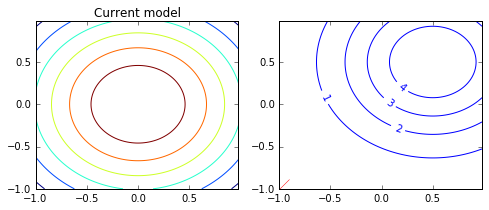

Enter rank (1-5):0


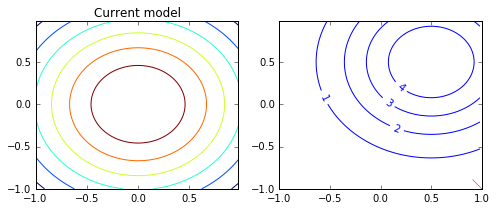

 Enter rank (1-5):0


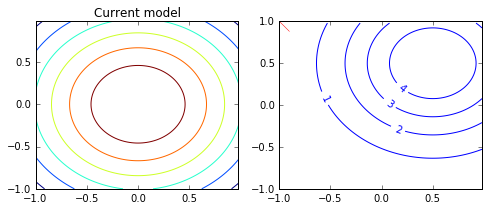

 Enter rank (1-5):0


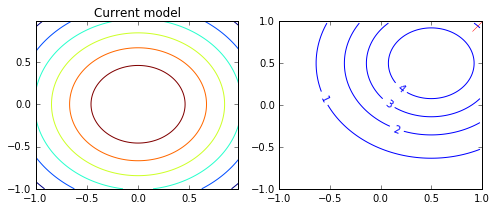

 Enter rank (1-5):1


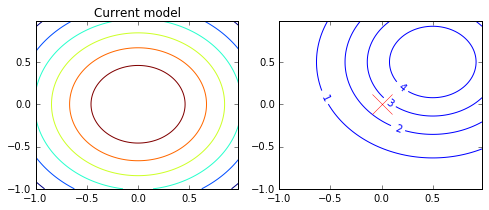

 Enter rank (1-5):2
 Gradient direction: [-0.13950185  0.99022181]


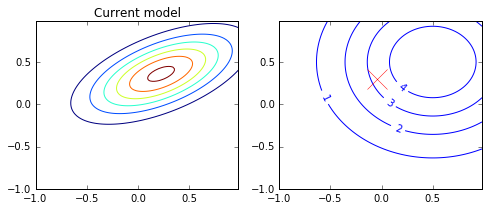

Enter rank (1-5):3
 Gradient direction: [ 0.90195586 -0.43182824]


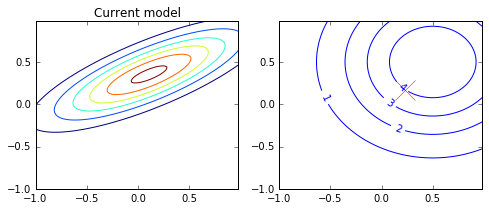

Enter rank (1-5):4
 Gradient direction: [ 0.  0.]


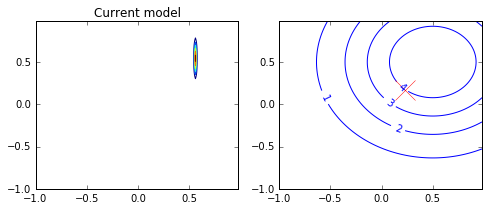

Enter rank (1-5):

In [ ]:
STEP = .3  # Determined by what seems like a small but significant step without causing thrashing
ITERATIONS = 20
current_x = np.array([0, 0])

for i in range(0, ITERATIONS):
    
    # Get values for every unlabeled x-point
    for xi in range(0, X.shape[0]):
        
        if xi >= y.shape[0]:
            newy = query_rank(xi, model)
            y = add_element(y, newy)
    
    model.fit(X, y)
    grad = model.gradient(current_x)
    unit_grad = grad / np.linalg.norm(grad) if np.linalg.norm(grad) > 0 else grad
    print "Gradient direction:", unit_grad
    
    # At most, move a unit away.  In the case of a small gradient, move only by that gradient
    stepped_grad = unit_grad if np.linalg.norm(grad) > 1 else grad
    current_x = current_x + stepped_grad * STEP
    X = add_element(X, current_x)

In [39]:
model.predict(np.array([[.45, .45]]))

5.0

In [40]:
X

array([[-1.        , -1.        ],
       [ 1.        , -1.        ],
       [-1.        ,  1.        ],
       [ 1.        ,  1.        ],
       [ 0.        ,  0.        ],
       [-0.04185056,  0.29706654],
       [ 0.2287362 ,  0.16751807],
       [ 0.2287362 ,  0.16751807]])

In [41]:
y

array([ 0.,  0.,  0.,  1.,  2.,  3.,  4.])